In [23]:
import numpy as np
import pandas as pd
import csv
import os
cwd=os.getcwd()
print("current folder is %s" %(cwd))

current folder is C:\Users\huwen


In [24]:
import matplotlib.pyplot as plt
bank = pd.read_csv ('/Users/huwen/Desktop/2018Spring/5610/Project/bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import sys

import graphviz
import pydotplus

import io
from scipy import misc
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
train, test= train_test_split(bank, test_size=0.15)

In [28]:
print("Training Size: {}; Test Size: {}".format(len(train),len(test)))

Training Size: 38429; Test Size: 6782


In [29]:
red_blue=["#19B5FE","#EF4836"]

palette=sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [30]:
pos_age=bank[bank['y']=="yes"]['age']
neg_age=bank[bank['y']=="no"]['age']
pos_job=bank[bank['y']=="yes"]['job']
neg_job=bank[bank['y']=="no"]['job']
pos_marital=bank[bank['y']=="yes"]['marital']
neg_marital=bank[bank['y']=="no"]['marital']
pos_education=bank[bank['y']=="yes"]['education']
neg_education=bank[bank['y']=="no"]['education']
pos_default=bank[bank['y']=="yes"]['default']
neg_default=bank[bank['y']=="no"]['default']
pos_balance=bank[bank['y']=="yes"]['balance']
neg_balance=bank[bank['y']=="no"]['balance']
pos_housing=bank[bank['y']=="yes"]['housing']
neg_housing=bank[bank['y']=="no"]['housing']
pos_loan=bank[bank['y']=="yes"]['loan']
neg_loan=bank[bank['y']=="no"]['loan']


pos_campaign=bank[bank['y']=="yes"]['campaign']
neg_campaign=bank[bank['y']=="no"]['campaign']

pos_loan=bank[bank['y']=="yes"]['loan']
neg_loan=bank[bank['y']=="no"]['loan']
pos_duration=bank[bank['y']=="yes"]['duration']
neg_duration=bank[bank['y']=="no"]['duration']
pos_pdays=bank[bank['y']=="yes"]['pdays']
neg_pdays=bank[bank['y']=="no"]['pdays']
pos_previous=bank[bank['y']=="yes"]['previous']
neg_previous=bank[bank['y']=="no"]['previous']
pos_poutcome=bank[bank['y']=="yes"]['poutcome']
neg_poutcome=bank[bank['y']=="no"]['poutcome']

D:\anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


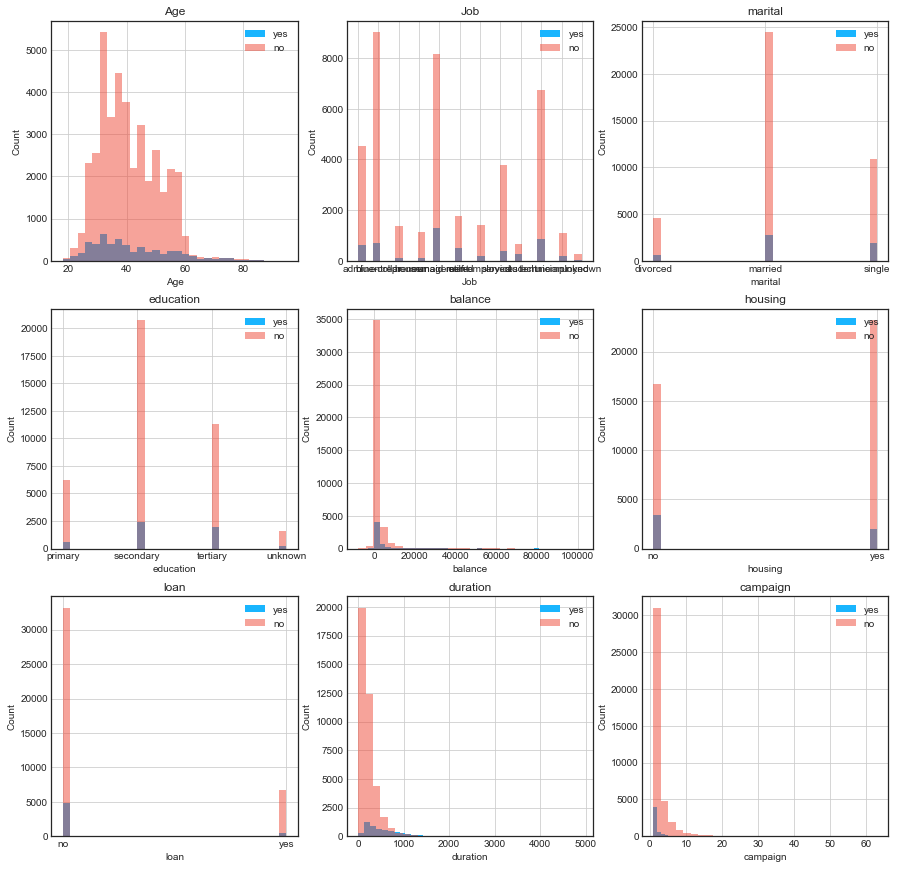

In [31]:
fig2 = plt.figure(figsize=(15,15))

# age
ax3= fig2.add_subplot(331)
ax3.set_xlabel('Age')
ax3.set_ylabel('Count')
ax3.set_title('Age')
pos_age.hist(alpha=1, bins=30,label='yes')
ax4 = fig2.add_subplot(331)
neg_age.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# job
ax5= fig2.add_subplot(332)
ax5.set_xlabel('Job')
ax5.set_ylabel('Count')
ax5.set_title('Job')
pos_job.hist(alpha=1, bins=30,label='yes')
ax6 = fig2.add_subplot(332)
neg_job.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# marital
ax7= fig2.add_subplot(333)
ax7.set_xlabel('marital')
ax7.set_ylabel('Count')
ax7.set_title('marital')
pos_marital.hist(alpha=1, bins=30,label='yes')
ax8 = fig2.add_subplot(333)
neg_marital.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# education
ax9= fig2.add_subplot(334)
ax9.set_xlabel('education')
ax9.set_ylabel('Count')
ax9.set_title('education')
pos_education.hist(alpha=1, bins=30,label='yes')
ax10 = fig2.add_subplot(334)
neg_education.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# balance
ax11= fig2.add_subplot(335)
ax11.set_xlabel('balance')
ax11.set_ylabel('Count')
ax11.set_title('balance')
pos_balance.hist(alpha=1, bins=30,label='yes')
ax12 = fig2.add_subplot(335)
neg_balance.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# housing
ax11= fig2.add_subplot(336)
ax11.set_xlabel('housing')
ax11.set_ylabel('Count')
ax11.set_title('housing')
pos_housing.hist(alpha=1, bins=30,label='yes')
ax12 = fig2.add_subplot(336)
neg_housing.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# loan
ax11= fig2.add_subplot(337)
ax11.set_xlabel('loan')
ax11.set_ylabel('Count')
ax11.set_title('loan')
pos_loan.hist(alpha=1, bins=30,label='yes')
ax12 = fig2.add_subplot(337)
neg_loan.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# duration
ax11= fig2.add_subplot(338)
ax11.set_xlabel('duration')
ax11.set_ylabel('Count')
ax11.set_title('duration')
pos_duration.hist(alpha=1, bins=30,label='yes')
ax12 = fig2.add_subplot(338)
neg_duration.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")
# campaign
ax11= fig2.add_subplot(339)
ax11.set_xlabel('campaign')
ax11.set_ylabel('Count')
ax11.set_title('campaign')
pos_campaign.hist(alpha=1, bins=30,label='yes')
ax12 = fig2.add_subplot(339)
neg_campaign.hist(alpha=0.5, bins=30,label='no')
plt.legend(loc="upper right")

In [32]:
c=DecisionTreeClassifier(min_samples_split=1000)

In [33]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
bank["job"].value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [35]:
# high income=3(management,admin.,entrepreneur)
# medium income=2(blue-collar,self-employed,technician)
# low income=1(services,retired,housemaid)
# no income=0(unemployed,student,unknown)


job_mapping={'management':3,
             'admin.':3,
             'entrepreneur':3,
             'blue-collar':2,
             'self-employed':2,
             'technician':2,
                'services':1,
            'retired':1,
            'housemaid':1,
             'unemployed':0,
             'student':0,
             'unknown':0}
bank['jobnum']=bank['job'].map(job_mapping)

In [36]:
bank["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [37]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [38]:
marital_mapping={'married':2,
                'single':1,
                 'divorced': 0}
bank['maritalnum']=bank['marital'].map(marital_mapping)

In [39]:
educationnum=pd.get_dummies(bank['education'])

In [40]:
education_mapping={'primary':1,
                'secondary':2,
                  'tertiary':3,
                  'unknown':0}
bank['educationnum']=bank['education'].map(education_mapping)


In [41]:
housingnum=pd.get_dummies(bank['housing'])
housing_mapping={'yes':1,
                'no':0}
bank['housingnum']=bank['housing'].map(housing_mapping)

loannum=pd.get_dummies(bank['loan'])
loan_mapping={'yes':1,
                'no':0}
bank['loannum']=bank['loan'].map(loan_mapping)

In [42]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,jobnum,maritalnum,educationnum,housingnum,loannum
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,3,2,3,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,2,1,2,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,3,2,2,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,2,2,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0,1,0,0,0


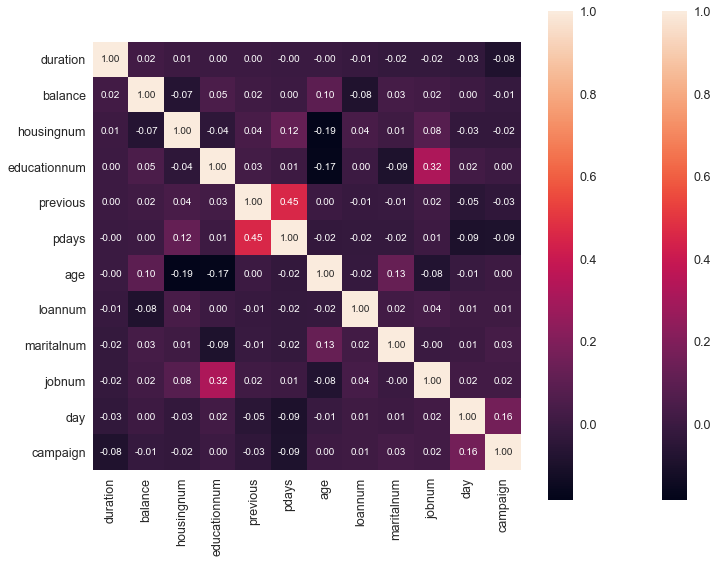

In [103]:

corrmat = bank.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)



k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'duration')['duration'].index
cm = np.corrcoef(bank[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',     annot_kws={'size': 10}, yticklabels=cols.values,    xticklabels=cols.values)
plt.show()

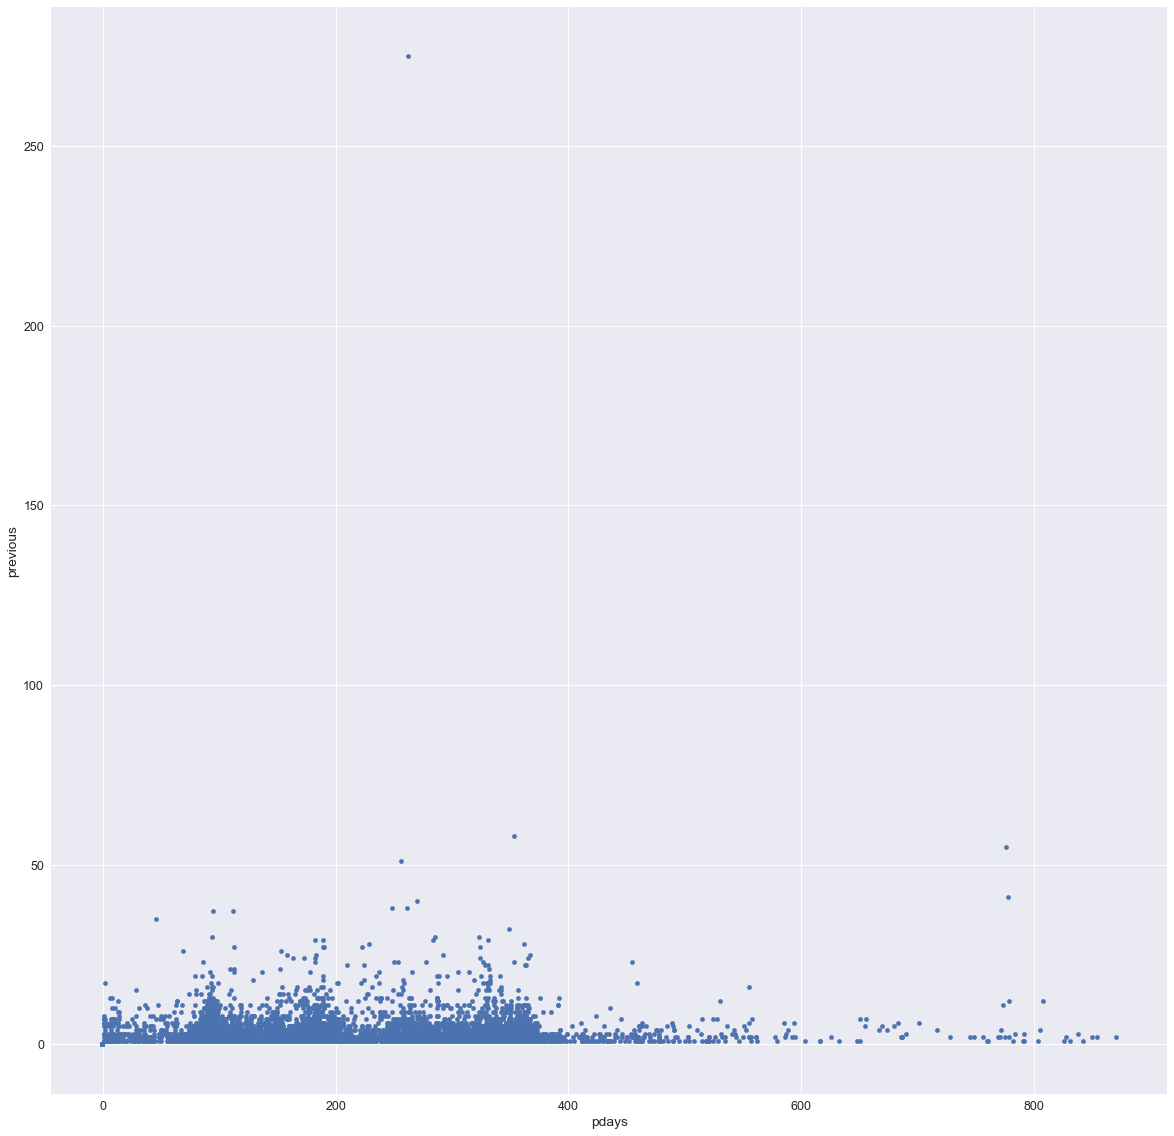

In [104]:
bank.plot(kind="scatter",x="pdays",y="previous")

In [100]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

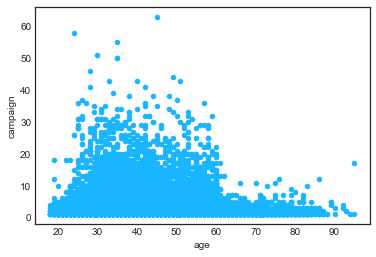

In [23]:
bank.plot(kind="scatter",x="age",y="campaign")

In [50]:
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

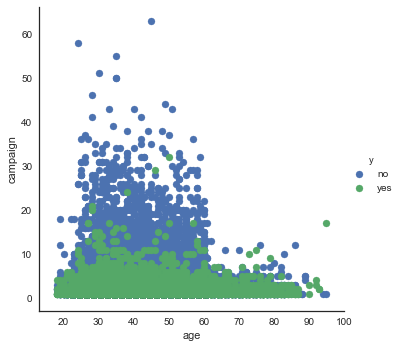

In [56]:

# 
sns.FacetGrid(bank, hue="y", size=5).map(plt.scatter, "age", "campaign").add_legend()

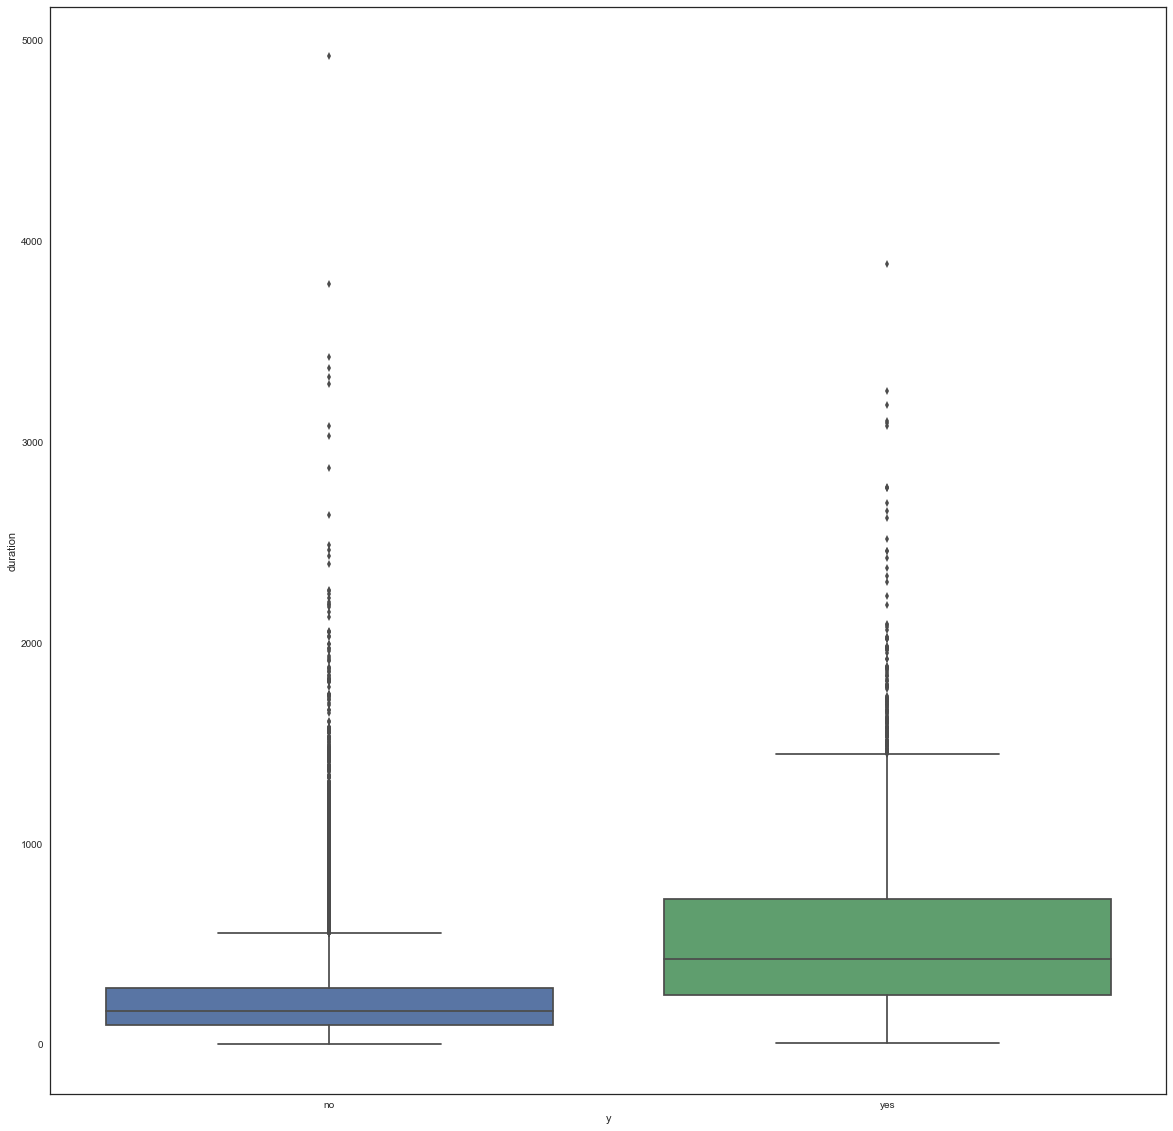

In [65]:
features=["balance","age","campaign","educationnum","housingnum","loannum","jobnum","maritalnum","duration"]
sns.boxplot(x="y", y="duration", data=bank)

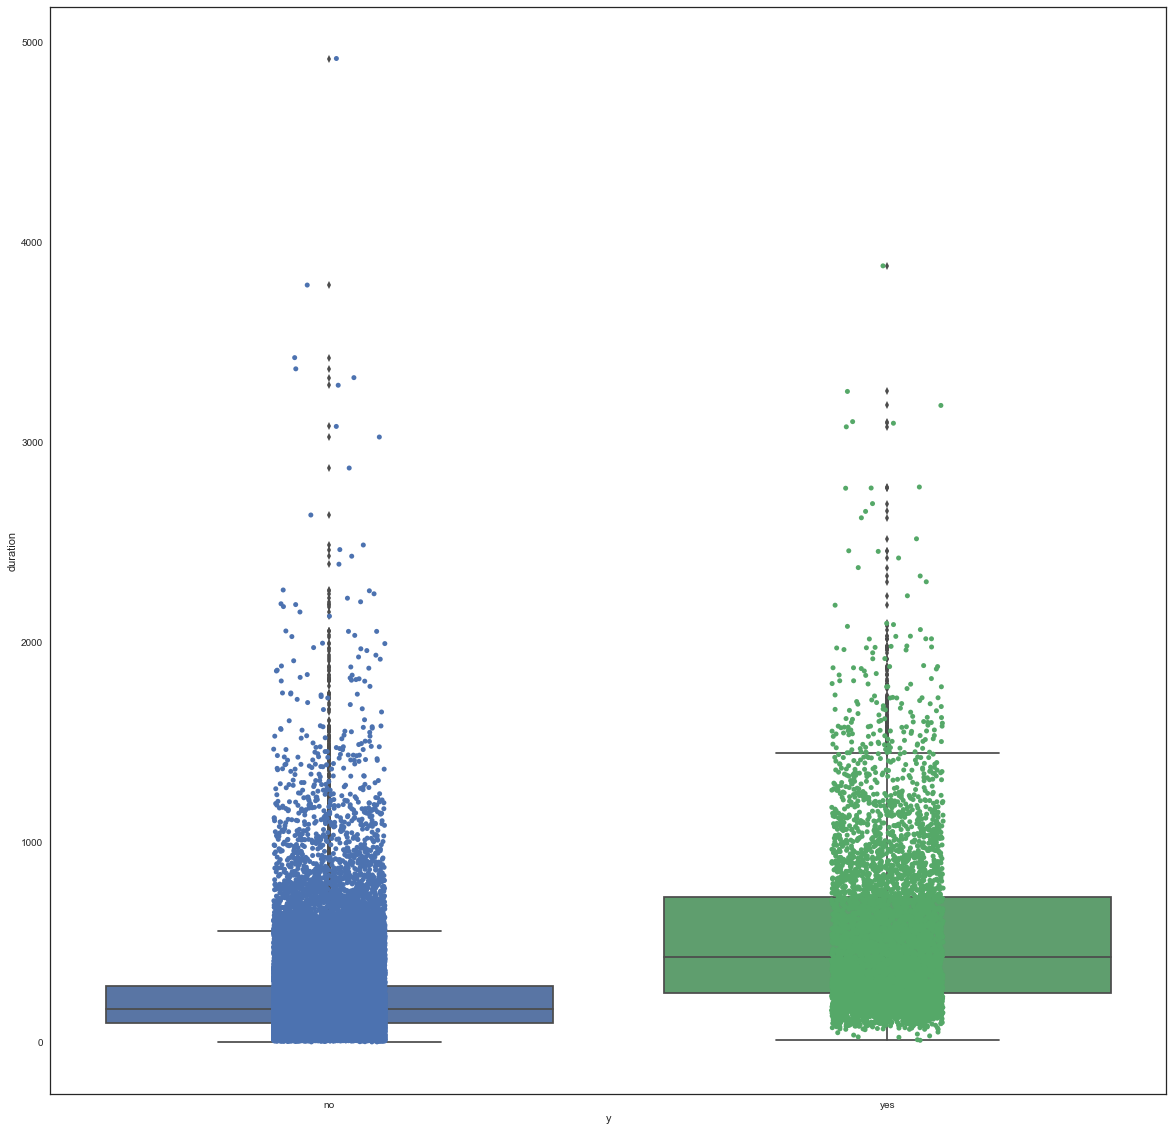

In [67]:
ax = sns.boxplot(x="y", y="duration", data=bank)
ax = sns.stripplot(x="y", y="duration", data=bank, jitter=True, edgecolor="gray")

In [69]:
sns.pairplot(bank.drop( axis=1), hue="y", size=3)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

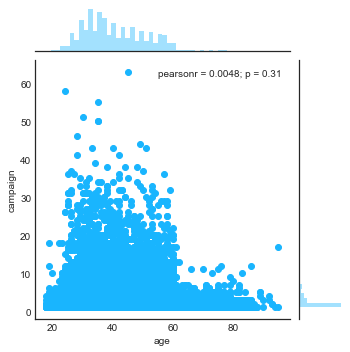

In [24]:
sns.jointplot(x="age",y="campaign",data=bank,size=5)

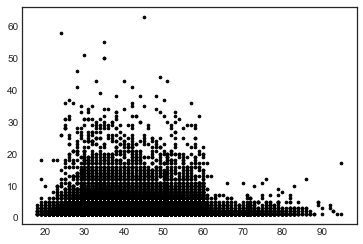

In [25]:
f1=bank['age'].values

f2=bank['campaign'].values


x=np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c='black',s=7)

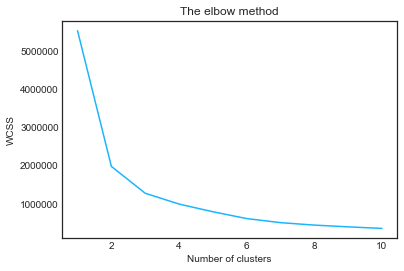

In [26]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [27]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans=kmeans.fit(x)
labels=kmeans.predict(x)
centroids=kmeans.cluster_centers_

y_kmeans = kmeans.fit_predict(x)
print(centroids)

[[34.11805287  2.74756256]
 [52.46660714  2.79136905]]


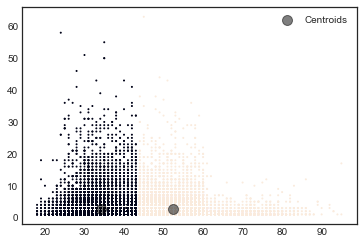

In [28]:
#Visualising the clusters
plt.scatter(x[:,0],x[:,1],s=1, c = y_kmeans)
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids',alpha=0.5)

plt.legend()

In [43]:
train, test= train_test_split(bank, test_size=0.15)

In [44]:
print("Training Size: {}; Test Size: {}".format(len(train),len(test)))


Training Size: 38429; Test Size: 6782


In [45]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,jobnum,maritalnum,educationnum,housingnum,loannum
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,3,2,3,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,2,1,2,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,3,2,2,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,2,2,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0,1,0,0,0


In [46]:

import scipy as sc

# Input a pandas series 
def ent(bank):
    p_data= bank.value_counts()/len(bank) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy


In [47]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,jobnum,maritalnum,educationnum,housingnum,loannum
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,3,2,3,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,2,1,2,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,3,2,2,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,2,2,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0,1,0,0,0


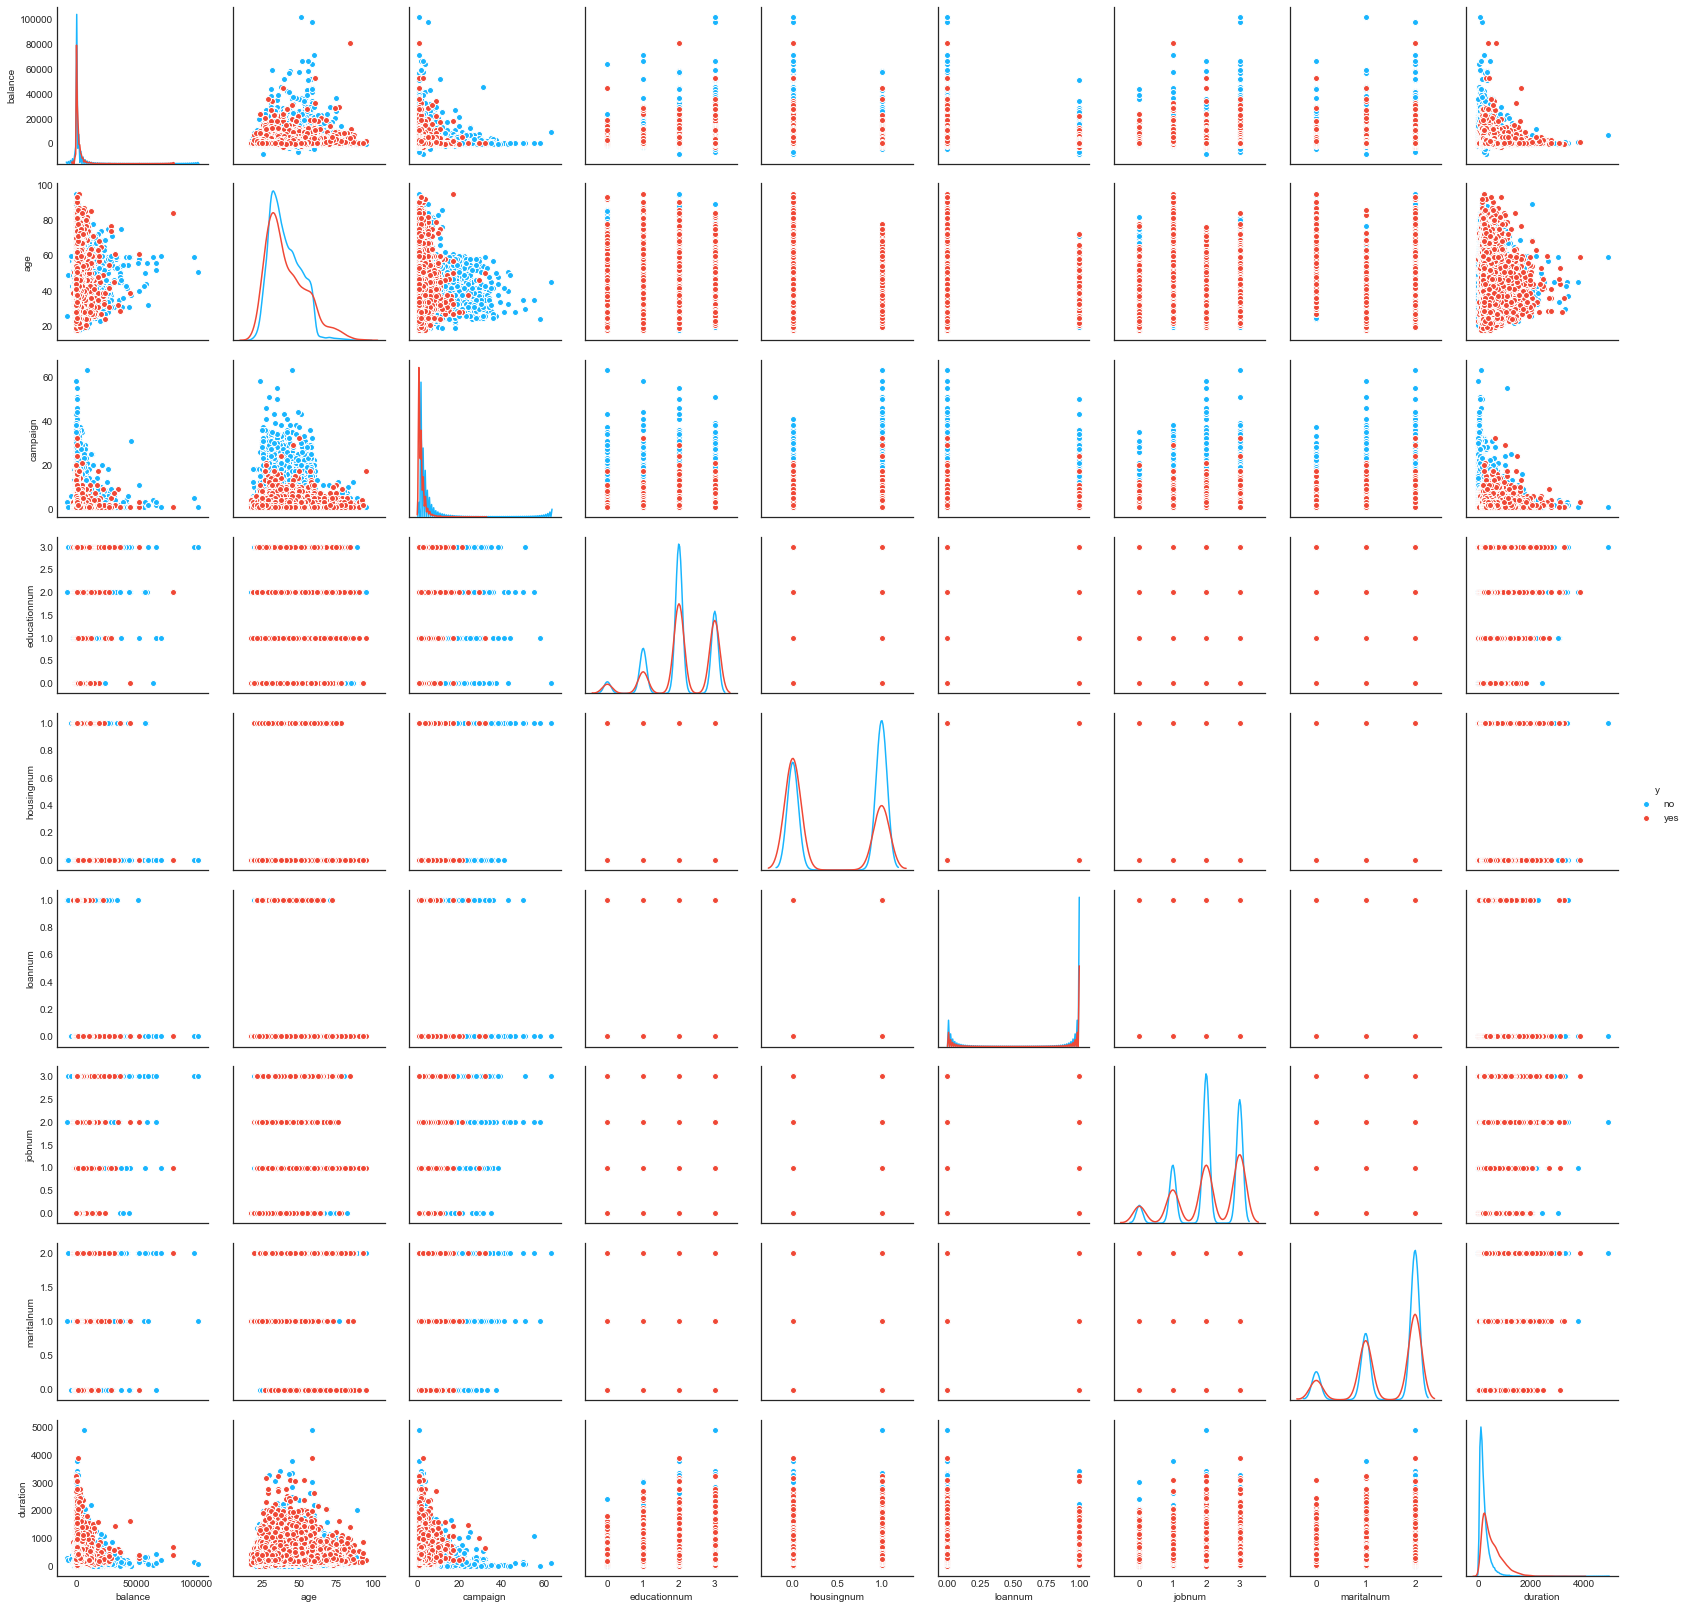

In [48]:
features=["balance","age","campaign","educationnum","housingnum","loannum","jobnum","maritalnum","duration","y"]
#sns.pairplot(bank[features],diag_kind='kde')

sns.pairplot(bank[features],hue='y',diag_kind='kde')
#features=["balance","age","campaign","job","marital","education","default","housing","loan","duration","pdays","previous","poutcome"]

In [49]:
features=["balance","age","campaign","educationnum","housingnum","loannum","jobnum","maritalnum","duration"]

In [50]:
train, test= train_test_split(bank, test_size=0.15)

In [51]:
print("Training Size: {}; Test Size: {}".format(len(train),len(test)))

Training Size: 38429; Test Size: 6782


In [52]:
x_train=train[features]
y_train=train["y"]

x_test=test[features]
y_test=test["y"]

In [53]:
dt=c.fit(x_train, y_train)

In [38]:
import os

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)



D:\anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


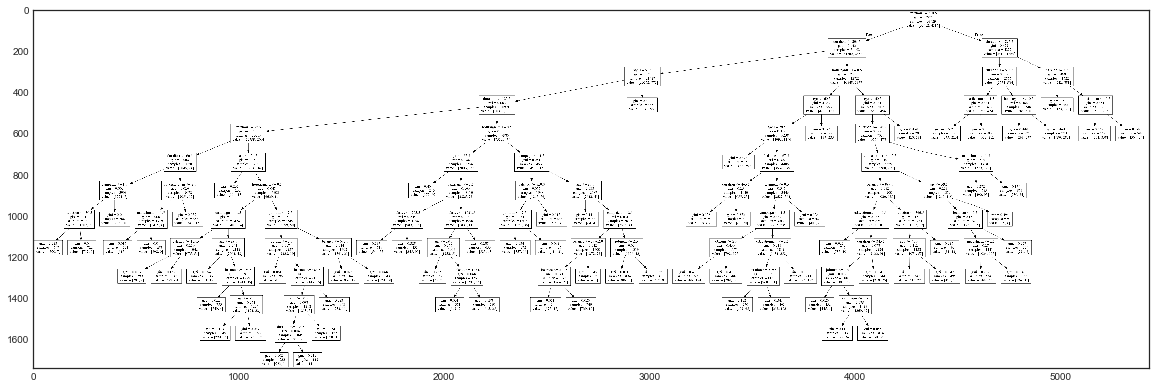

In [39]:
def show_tree(tree,features,path):
    f= io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img= misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

show_tree(dt,features,'tree.png')

In [40]:
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,jobnum,maritalnum,educationnum,housingnum,loannum
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,3,2,3,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,2,1,2,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,3,2,2,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,2,2,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0,1,0,0,0


In [41]:
bank.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
45181    False
45182    False
45183    False
45184    False
45185    False
45186    False
45187    False
45188    False
45189    False
45190    False
45191    False
45192    False
45193    False
45194    False
45195    False
45196    False
45197    False
45198    False
45199    False
45200    False
45201    False
45202    False
45203    False
45204    False
45205    False
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [42]:
bank.isnull().any()

age             False
job             False
marital         False
education       False
default         False
balance         False
housing         False
loan            False
contact         False
day             False
month           False
duration        False
campaign        False
pdays           False
previous        False
poutcome        False
y               False
jobnum          False
maritalnum      False
educationnum    False
housingnum      False
loannum         False
dtype: bool

In [54]:
from sklearn.preprocessing import StandardScaler
#features = ['age', 'job', 'marital', 'education','default','balance','housing','loan','duration','campaign','pdays']
X = bank[features]
y= bank["y"]

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train)

In [78]:
y_predict = model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8411926037335221

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[9029,  969],
       [ 826,  479]], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

         no       0.92      0.90      0.91      9998
        yes       0.33      0.37      0.35      1305

avg / total       0.85      0.84      0.84     11303

